In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('/kaggle/input/housingcsv/housing.csv')
dataset.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [6]:
dataset['RM'].isnull().sum()

0

In [7]:
dataset['LSTAT'].isnull().sum()

0

In [8]:
dataset['PTRATIO'].isnull().sum()

0

## Splitting into dependent and independent variable

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [10]:
print(X)

[[ 6.575  4.98  15.3  ]
 [ 6.421  9.14  17.8  ]
 [ 7.185  4.03  17.8  ]
 ...
 [ 6.976  5.64  21.   ]
 [ 6.794  6.48  21.   ]
 [ 6.03   7.88  21.   ]]


### therefore no encoding needed here

## Splitting into training and test set

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Applying the multiple linear regression model

In [12]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### to print predicted values and actual values side by side

In [13]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[423881.78 417900.  ]
 [680175.7  632100.  ]
 [299260.76 281400.  ]
 [392611.22 577500.  ]
 [530004.12 474600.  ]
 [358978.92 359100.  ]
 [229712.66 247800.  ]
 [413822.48 474600.  ]
 [476083.34 449400.  ]
 [372832.64 411600.  ]
 [317887.97 214200.  ]
 [356411.61 214200.  ]
 [476957.35 428400.  ]
 [ 41708.57 375900.  ]
 [488212.52 577500.  ]
 [311735.07 327600.  ]
 [464748.13 420000.  ]
 [614234.98 489300.  ]
 [381107.3  470400.  ]
 [654465.18 640500.  ]
 [669847.67 651000.  ]
 [654791.29 690900.  ]
 [  2659.33 147000.  ]
 [456701.79 441000.  ]
 [360629.19 367500.  ]
 [754076.24 966000.  ]
 [710239.11 756000.  ]
 [753933.55 888300.  ]
 [430146.74 455700.  ]
 [422726.63 445200.  ]
 [373193.32 323400.  ]
 [457577.73 455700.  ]
 [473612.26 430500.  ]
 [682085.65 867300.  ]
 [456621.36 445200.  ]
 [768574.93 875700.  ]
 [521836.21 415800.  ]
 [256253.31 268800.  ]
 [504441.56 590100.  ]
 [593086.87 497700.  ]
 [318422.2  231000.  ]
 [442998.86 315000.  ]
 [403020.85 388500.  ]
 [500263.2 

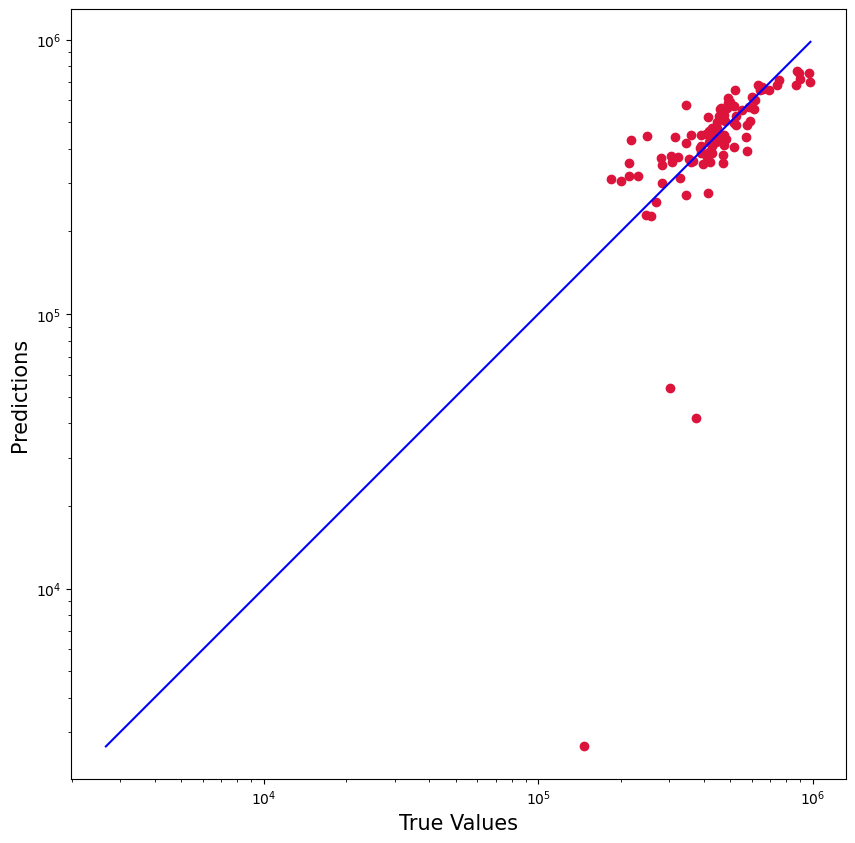

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()